In [ ]:
import pandas as pd

In [ ]:
# import clean dataframe
url = "https://drive.google.com/file/d/1Fm4y3PhN1c2th7UAA3unPdDi97IqfgQQ/view?usp=sharing"
path = f"https://drive.google.com/uc?export=download&id={url.split('/')[-2]}"
audio_og = pd.read_csv(path)

In [ ]:
#!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.7 MB/s eta 0:00:00


In [ ]:
audio_og.head()

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster,artists_id
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,...,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,14,7oEkUINVIj1Nr3Wnj8tzqr
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,...,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,15,3pO5VjZ4wOHCMBXOvbMISG
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,...,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,12,6rM2yY0GnVcOHMU5GD3y9E
3,3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,...,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...,1,3vlUveVfzPXzhiPGjHHxOH
4,4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,...,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...,1,1UhC1mCcd9SFXLibHhMX61


In [ ]:
# import necessary libraries

import requests # for making HTTP requests
from urllib.parse import urlencode  # for encoding URL parameters
import base64  # for base64 encoding/decoding
import webbrowser  # for opening web pages
import json  # for working with JSON data
import spotipy  # for interacting with the Spotify API
import pickle  # for serializing/deserializing Python objects
from spotipy.oauth2 import SpotifyOAuth  # for Spotify OAuth authorization
import time  # for time-related functions

In [ ]:
# get access token from Spotify API
def get_token():
    client_id =   # your Spotify client id
    client_secret =   # your Spotify client secret

    # concatenate client id and client secret with a colon
    auth_string = client_id + ':' + client_secret
    auth_bytes = auth_string.encode('utf-8')  # encode to bytes
    auth_base64 = str(base64.b64encode(auth_bytes), 'utf-8')  # base64 encode to string

    url = 'https://accounts.spotify.com/api/token'  # Spotify API token endpoint
    headers = {
        'Authorization': 'Basic ' + auth_base64,  # 'Basic' auth using base64 encoded client credentials
        'Content-Type': 'application/x-www-form-urlencoded'  # form URL encoded data
    }
    data = {'grant_type': 'client_credentials'}  # grant type for client credentials flow

    # send POST request to Spotify token endpoint
    result = requests.post(url, headers=headers, data=data)
    json_result = json.loads(result.content)  # parse JSON response
    token = json_result['access_token']  # extract access token from JSON
    return token  # return access token


# generate authorization header with access token
def get_auth_header(token):
    return {'Authorization': 'Bearer ' + token}  # return authorization header with Bearer token

In [ ]:
# function to retrieve genres for each artist in a DataFrame using Spotify API

# to search for artists' genres using Spotify API
def search_for_artists_genres(token):
    artist_genres = []  # initialize an empty list to store genres for each artist

    # iterate through each row in the DataFrame 'audio_og'
    for i, row in audio_og.iterrows():
        artist_id = row['artists_id']  # get the artist ID from the current row
        url = f'https://api.spotify.com/v1/artists/{artist_id}'  # Spotify API endpoint for artist information
        headers = get_auth_header(token)  # get authorization header using the provided access token

        try:
            # send GET request to Spotify API to retrieve artist information
            result = requests.get(url, headers=headers)

            # check if the request was successful (status code 200)
            if result.status_code == 200:
                json_result = result.json()  # parse JSON response

                # check if 'genres' key exists and is not empty in the JSON response
                if 'genres' in json_result and json_result['genres']:
                    artists_genre = json_result['genres']  # get genres associated with the artist
                    artist_genres.append(artists_genre)  # append genres to the list
                else:
                    print(f"No artist information found for track {artist_id}")
                    artist_genres.append(None)  # handle cases where no genres are found
            else:
                print(f"Request for track {artist_id} failed with status code {result.status_code}")
                artist_genres.append(None)  # handle errors by adding None to the list

            time.sleep(0.2)  # Pause execution for 0.2 seconds to avoid overwhelming the API

        except requests.exceptions.RequestException as e:
            print(f"Error during API request: {e}")
            artist_genres.append(None)  # handle request exceptions by adding None to the list

    return artist_genres  # return the list of genres for all artists

# obtain access token from Spotify API using client credentials flow
token = get_token()
# call the function to search for artists' genres and assign the result to 'artist_genres'
artist_genres = search_for_artists_genres(token)
# add a new column 'artist_genres' to the DataFrame 'audio_og' containing the retrieved genres
audio_og['artist_genres'] = artist_genres
# display the first few rows of the updated DataFrame 'audio_og'
audio_og.head()

No artist information found for track 5dw52Iap2K2flKxNY0ICDs
No artist information found for track 0F3ecxsZ3eVHCMGnE5EK8D
No artist information found for track 7pYCCfn6BMRxE6oMMU8ebR
No artist information found for track 4Yd6o5qtdCVUflCnuLPVG1
No artist information found for track 5dw52Iap2K2flKxNY0ICDs
No artist information found for track 5dw52Iap2K2flKxNY0ICDs
No artist information found for track 5wd2VuNxYv2rZ3z6qY0Wvx
No artist information found for track 7pYCCfn6BMRxE6oMMU8ebR
No artist information found for track 7pYCCfn6BMRxE6oMMU8ebR
No artist information found for track 6hCsqVHnBo1BVQWuIjRMkL
No artist information found for track 7pYCCfn6BMRxE6oMMU8ebR
No artist information found for track 7ipdAhXlrDGrLfb8dGFbnI
No artist information found for track 73In9s7BS9nUHvswj52bmg
No artist information found for track 1i2HMFDoThWNij6CtP9DRd
No artist information found for track 1i2HMFDoThWNij6CtP9DRd
No artist information found for track 1ayT0I2rfy0C7WV08pHBsL
No artist information fo

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,duration_ms,time_signature,id,html,cluster,artists_id,artist_genres
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,...,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,14,7oEkUINVIj1Nr3Wnj8tzqr,"[bossa nova, mpb, samba, tropicalia, violao]"
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,...,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,15,3pO5VjZ4wOHCMBXOvbMISG,"[bossa nova, brazilian classical, brazilian ja..."
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,...,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,12,6rM2yY0GnVcOHMU5GD3y9E,"[axe, mpb, pagode, samba, umbanda, velha guarda]"
3,3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,...,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...,1,3vlUveVfzPXzhiPGjHHxOH,"[bossa nova, mpb, musica paraibana, samba]"
4,4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,...,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...,1,1UhC1mCcd9SFXLibHhMX61,"[contemporary vocal jazz, vocal jazz]"


In [ ]:
# import necessary library for displaying file download link
from IPython.display import FileLink

# export DataFrame 'audio_og' to CSV file 'audio_og_genre.csv' without including the index
audio_og.to_csv('audio_og_genre.csv', index=False)
# create a link to download the generated CSV file 'audio_og_genre.csv'
FileLink('audio_og_genre.csv')


/content/audio_og_genre.csv

In [ ]:
# first install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

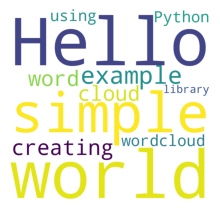

In [ ]:
# check if worfcloud was correctly installed
text_data = "Hello world, this is a simple example of creating a word cloud in Python using the wordcloud library."

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text_data)

plt.figure(figsize=(2, 3), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Initialize a dictionary to store genres for each cluster as a single string
clusters_genres = {}

# Iterate through each row in the DataFrame
for index, row in audio_og.iterrows():
    cluster = row['cluster']
    genres = row['artist_genres']

    # Check if genres is not None
    if genres is not None:
        # Join genres with commas, replacing spaces with underscores in each genre
        genre_str = ', '.join(genre.replace(' ', '-') for genre in genres)

        # If the cluster is not in the dictionary, initialize an empty string
        if cluster not in clusters_genres:
            clusters_genres[cluster] = ''

        # Append genres to the corresponding cluster as a string
        clusters_genres[cluster] += genre_str + ', '

# Print the result
for cluster, genres_str in clusters_genres.items():
    print(f"Cluster {cluster}: {genres_str.rstrip(', ')}")

Cluster 14: bossa-nova, mpb, samba, tropicalia, violao, bossa-nova, mpb, musica-paraibana, samba, bossa-nova, mpb, samba, tropicalia, violao, bossa-nova, manguebeat, mpb, samba, samba-rock, tropicalia, bossa-nova, mpb, samba-de-roda, tropicalia, bossa-nova, mpb, samba, tropicalia, violao, argentine-rock, rock-nacional, escape-room, minnesota-hip-hop, pop, trap-queen, dutch-house, edm, electro-house, melbourne-bounce, melbourne-bounce-international, pop-dance, progressive-electro-house, adult-standards, easy-listening, lounge, album-rock, classic-rock, dance-rock, new-romantic, new-wave, new-wave-pop, permanent-wave, post-punk, rock, zolo, dance-pop, girl-group, pop, pop, dance-pop, pop, pop-dance, pop-rap, dance-pop, europop, girl-group, talent-show, dance-pop, girl-group, pop, r&b, urban-contemporary, dance-pop, pop, pop-rap, dance-pop, pop, pop, gangster-rap, hip-hop, pop-rap, rap, trap, urban-contemporary, g-funk, gangster-rap, west-coast-rap, bebop, contemporary-post-bop, cool-jazz

In [ ]:
# Generate word clouds for each cluster
for cluster, genres_str in clusters_genres.items():
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10, colormap = 'magma').generate(genres_str)

    # Plotting
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.axis("off")
    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.